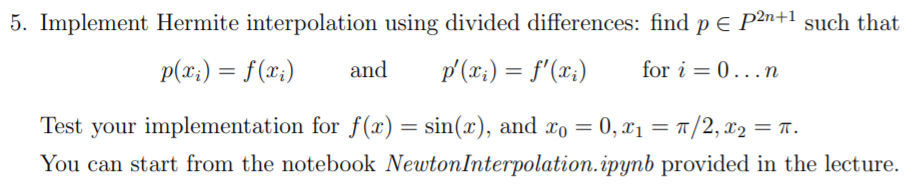


Hermite Interpolation mit $d_i = 1$.
Verwende Neville Algorithmus. Bei einfacher Wiederholung von Abtaststellen wird statt der üblichen Berechnung die erste Ableitung an diesem Punkt gewählt für Knoten die übereinander liegen.

<function matplotlib.pyplot.show(*args, **kw)>

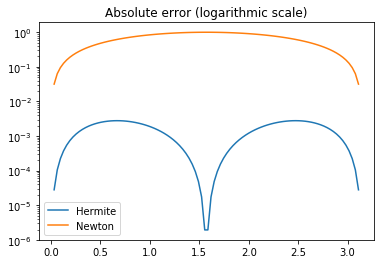

In [48]:
from math import pi,sin,cos
import math as math
import numpy as np
import matplotlib.pyplot as plt

def NewtonInterpol (pts, vals):
    """
    Calculate coefficients of Newton interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       
    output: 
       divided differences
    """
    
    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            #print ("i =",i, ", j =",j)
            dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd

def Hermite1Interpol (pts, vals, derivatives):
    """
    Calculate coefficients of 1st order Hermite interpol by 
    divided differences.
    
    input: 
       pts ... list of points
       val ... list of values
       derivatives ... list of first derivatives at points
       
    output: 
       divided differences
    """
    
    n = len(pts)-1
    dd = np.asarray(vals, dtype = float)
    for i in range(n):
        for j in range(n, i, -1):
            #check if points have the same value
            if pts[j] == pts[j-i-1]:
                #in that case set to derivative
                dd[j] = derivatives[j]
            else:
                #otherwise use usual neville formula
                dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd

def Horner (pts, dd, x):
    """
    Horner scheme for polynomial evaluation in Newton basis
    """
    n = len(pts)-1
    sum = dd[n]
    for i in range(n-1, -1, -1):
        sum = sum * (x-pts[i]) + dd[i]
    return sum

pts = [0, 0, pi/2, pi/2, pi, pi]
vals = [0, 0, 1, 1, 0, 0]
der = [1, 1, 0, 0, -1, -1]
dd = Hermite1Interpol (pts, vals, der)

#newton interpol as comparison
pts1 = [0, pi/2, pi]
vals1 = [0, 1, 0]
dd1 = NewtonInterpol(pts1, vals1)

#get error 
x = np.linspace(0, pi, 100)
f = lambda x: np.sin(x)
p = Horner(pts, dd, x)
error = np.abs(p-f(x))

p1 = Horner(pts1, dd1, x)
error1 = np.abs(p1-f(x))


#truncate ends for better plot
error[0] = np.nan
error[-1] = np.nan
error1[0] = np.nan
error1[-1] = np.nan
plt.plot(x, error, label='Hermite')
plt.plot(x, error1, label='Newton')
plt.yscale("log")
plt.title("Absolute error (logarithmic scale)")
plt.legend(loc='lower left')
plt.show

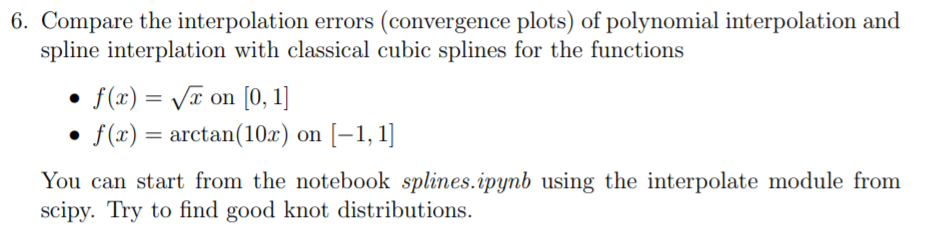

Im folgenden werden die Funktionen als $$f(x) = \sqrt x $$ und $$ g(x) = arctan(10x) $$ bezeichnet

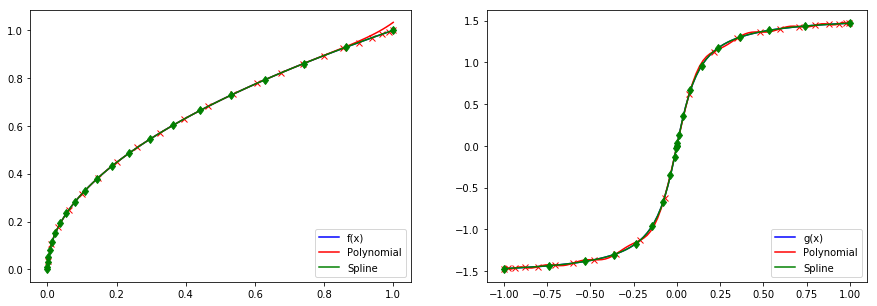

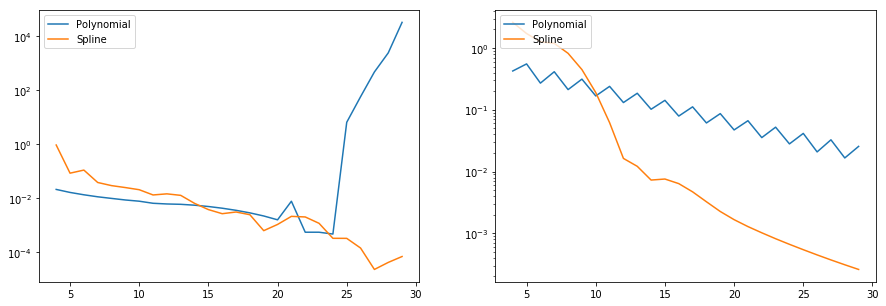

In [124]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

def ChebPoints(n):
    # n is number of points, highest point therefore is n-1
    x = np.zeros(n)
    
    for i in range(0, n):
        x[i] = np.cos(np.pi*(i + 0.5)/(n))
        
    return x

def ScaledCheb(x_min, x_max, n):
    """
    Returns a scaled version of Chebyshev Points
    """
    temp = ChebPoints(n)
    scale = (x_max - x_min)/2
    temp = temp * scale
    offset = x_max - scale
    temp = temp + offset
    
    return temp

def SplinePts(x_min, x_max, n):
    """
    x_min > -1 und x_max < 1 muss gelten
    """
    # Funktionen interessant um den Nullpunkt, deshalb Punkte dort dichter
    return np.linspace(x_min, x_max, n)**3
    

f = lambda x: x**(1/2)
g = lambda x: np.arctan(10*x)
n = 22

#choose chebyshev distribution for polynomial interpolation
zpf = ScaledCheb(0, 1, n)
zsf = SplinePts(0, 1, n)
xf = np.linspace(0,1,100)
fp = interpolate.lagrange(zpf, f(zpf))
fs = interpolate.CubicSpline(zsf, f(zsf))

zpg = ScaledCheb(-1,1,n)
zsg = SplinePts(-1,1,n)
xg = np.linspace(-1,1,100)
gp = interpolate.lagrange(zpg, g(zpg))
gs = interpolate.CubicSpline(zsg, g(zsg))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[15,5])
ax1.plot(xf, f(xf), 'b', label="f(x)")
ax1.plot(zpf, f(zpf), 'rx')
ax1.plot(xf, fp(xf), 'r', label="Polynomial")
ax1.plot(zsf, f(zsf), 'gd')
ax1.plot(xf, fs(xf), 'g', label="Spline")
ax1.legend(loc='lower right')

ax2.plot(xg, g(xg), 'b', label="g(x)")
ax2.plot(zpg, g(zpg), 'rx')
ax2.plot(xg, gp(xg), 'r', label="Polynomial")
ax2.plot(zsg, g(zsg), 'gd')
ax2.plot(xg, gs(xg), 'g', label="Spline")
ax2.legend(loc='lower right')
plt.show()

rng = range(4,30)
errorpf = []
errorpg = []
errorsf = []
errorsg = []
for n in rng:
    #get knots for both functions
    zpf = ScaledCheb(0, 1, n)
    zpg = ScaledCheb(-1, 1, n)
    zsf = SplinePts(0, 1, n)
    zsg = SplinePts(-1, 1, n)
    #calculate interpolates
    fp = interpolate.lagrange(zpf, f(zpf))
    gp = interpolate.lagrange(zpg, g(zpg))
    fs = interpolate.CubicSpline(zsf, f(zsf))
    gs = interpolate.CubicSpline(zsg, g(zsg))
    #evaluate errors
    errpf = f(xf)-fp(xf)
    errpg = g(xg)-gp(xg)
    errsf = f(xf)-fs(xf)
    errsg = g(xg)-gs(xg)
    errorpf.append (np.abs(np.max(errpf)))
    errorpg.append (np.abs(np.max(errpg)))
    errorsf.append (np.abs(np.max(errsf)))
    errorsg.append (np.abs(np.max(errsg)))

fig, (ex1, ex2) = plt.subplots(1,2, figsize=[15,5])
ex1.plot(rng, errorpf, label="Polynomial")
ex1.set_yscale('log')
ex1.plot(rng, errorsf, label="Spline")
ex1.legend(loc='upper left')

ex2.set_yscale('log')
ex2.plot(rng, errorpg, label="Polynomial")
ex2.plot(rng, errorsg, label="Spline")
ex2.legend(loc='upper left')

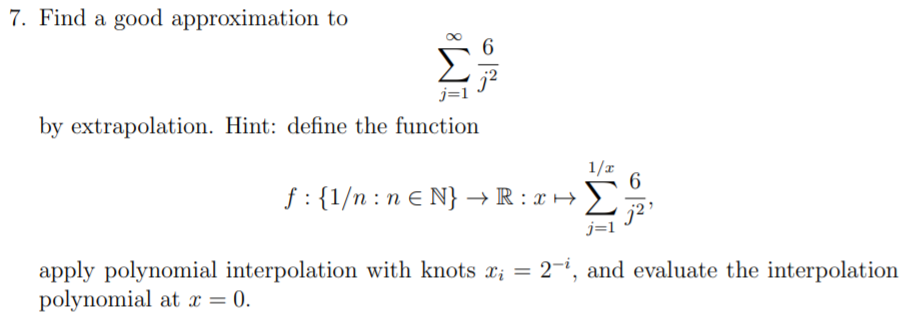

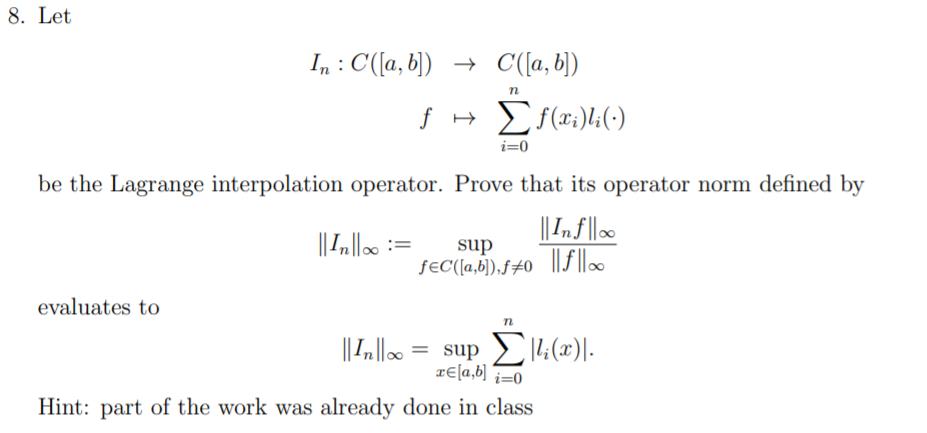